In [1]:
!nvidia-smi

Sun Feb 16 10:37:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

%tensorflow_version 2.x
%matplotlib inline

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [11]:
# Loading Data

import glob
import shutil


for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
# Data Augmentation

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
BATCH_SIZE = 100
IMG_SIZE = 150

In [0]:
image_gen_train = ImageDataGenerator(
                  rescale=1./255, # Rescaling images between f(x)=max(0,255)
                  rotation_range=45, # Rotate images 45 degrees
                  width_shift_range=0.15, # Shift Range
                  height_shift_range=0.15,
                  zoom_range=0.5, # Zoom on images
                  horizontal_flip=True, # Flip the images horizontally
)

In [16]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='sparse'
)

Found 2935 images belonging to 5 classes.


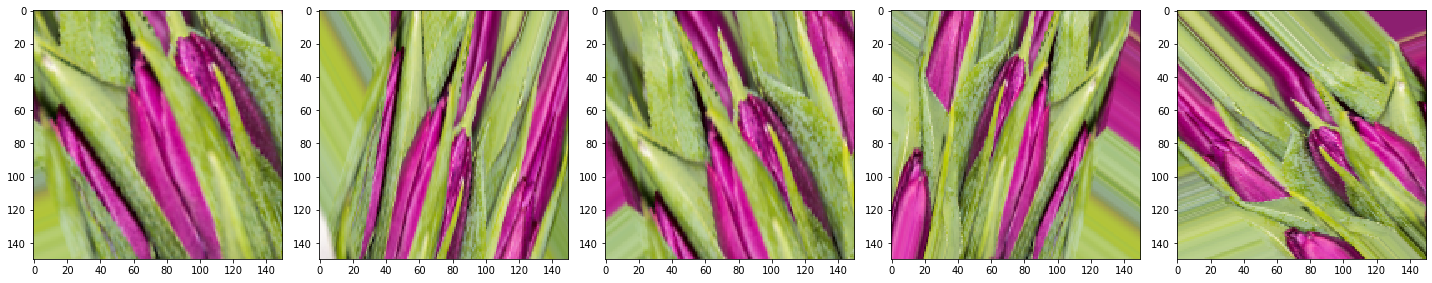

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SIZE,IMG_SIZE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu,input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(5,activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [34]:
epochs = 80
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=31,
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=8)

Epoch 1/80
31/31 [==============================] - 25s 814ms/step - loss: 1.5908 - acc: 0.2972 - val_loss: 1.4762 - val_acc: 0.4027
Epoch 2/80
31/31 [==============================] - 23s 741ms/step - loss: 1.4297 - acc: 0.4623 - val_loss: 1.3827 - val_acc: 0.5020
Epoch 3/80
31/31 [==============================] - 23s 738ms/step - loss: 1.3801 - acc: 0.5150 - val_loss: 1.3549 - val_acc: 0.5456
Epoch 4/80
31/31 [==============================] - 23s 737ms/step - loss: 1.3568 - acc: 0.5420 - val_loss: 1.3411 - val_acc: 0.5483
Epoch 5/80
31/31 [==============================] - 23s 734ms/step - loss: 1.3235 - acc: 0.5753 - val_loss: 1.2880 - val_acc: 0.6068
Epoch 6/80
31/31 [==============================] - 23s 755ms/step - loss: 1.2974 - acc: 0.6046 - val_loss: 1.2936 - val_acc: 0.6150
Epoch 7/80
31/31 [==============================] - 23s 730ms/step - loss: 1.2959 - acc: 0.6040 - val_loss: 1.2937 - val_acc: 0.5959
Epoch 8/80
31/31 [==============================] - 22s 719ms/step - 

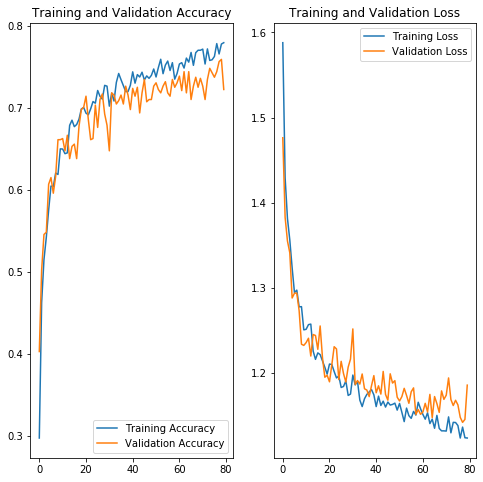

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()